In [1]:
from generateur import *
import numpy as np
from mdp import *
from gurobipy import *
import matplotlib.pyplot as plt
import time

### Question2b: experiences des resolutions
Dans cette partie, on va etudier les impacts poses par la probabilite de transition et le coefficient d'actualisation sur les temps de resolutions et sur le nombre d'iterations. 

On fait des experiences de facons suivants: pour chaque probabilite de transition entre 1 et 0.6, on tirera 15 instances aleatoirement pour chaque taille de grille((10,10),(10,15),(15,20)) et on calculera le temps de resolutions moyens obtenus et le nombre moyen d'iteration.

In [2]:
proba = [1,0.6]
taille = [(10,10),(10,15),(15,20)]
tmps_ites = np.zeros((len(proba),len(taille),2))
N = 15
gamma = 0.9

In [3]:
for i in range(len(proba)):
    for j in range(len(taille)):
        p = proba[i]
        t = taille[j]
        t_moyen = 0
        ite_moyen = 0
        g = generator(t[0],t[1],0.1,[0.1,0.2,0.3,0.4],p)
        
        for n in range(N):
            cases = g.random_init()
            pdm = Pdm(cases,gamma,p)
            time_start = time.time()
            nb_ite,value,policy = pdm.value_iteration()
            time_end = time.time()
            ite_moyen += nb_ite
            t_moyen += time_end-time_start
        tmps_ites[i,j,0] = t_moyen/N
        tmps_ites[i,j,1] = ite_moyen/N 

In [4]:
tmps_ites

array([[[ 0.29038312, 19.        ],
        [ 0.56061041, 27.53333333],
        [ 1.39382807, 34.        ]],

       [[ 0.40957082, 30.        ],
        [ 0.73795562, 33.2       ],
        [ 1.93985306, 44.66666667]]])

### Impact p-temps moyens

In [5]:
y_1 = tmps_ites[0,:,0]

In [6]:
y_2 = tmps_ites[1,:,0]

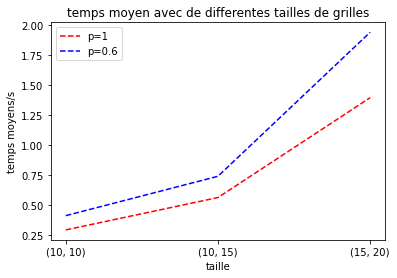

In [7]:
x = range(len(taille))
l1=plt.plot(x,y_1,'r--',label="p=1")
l2=plt.plot(x,y_2,'b--',label="p=0.6")
plt.xticks(x,taille)
plt.title("temps moyen avec de differentes tailles de grilles")
plt.xlabel("taille")
plt.ylabel("temps moyens/s")
plt.legend()
plt.show()

### Impact p-nb d'iterations moyens

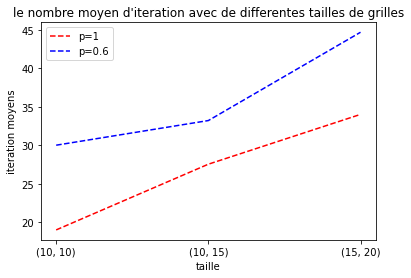

In [8]:
y_1 = tmps_ites[0,:,1]
y_2 = tmps_ites[1,:,1]

x = range(len(taille))
l1=plt.plot(x,y_1,'r--',label="p=1")
l2=plt.plot(x,y_2,'b--',label="p=0.6")
plt.xticks(x,taille)
plt.title("le nombre moyen d'iteration avec de differentes tailles de grilles")
plt.xlabel("taille")
plt.ylabel("iteration moyens")
plt.legend()
plt.show()

### Impact $\gamma$ 

In [9]:
gamma = [0.6,0.7,0.9]
tmps_ites_gamma = np.zeros((len(gamma),2))
p = 0.6
N = 15

In [10]:
for n in range(N):
    
    cases = g.random_init()
    
    for i in range(len(gamma)):
        t_moyen = 0
        pdm = Pdm(cases,gamma[i],p)
        time_start = time.time()
        nb_ite,value,policy = pdm.value_iteration()
        time_end = time.time()
        t_moyen += time_end-time_start
        tmps_ites_gamma[i,0]+=t_moyen
        tmps_ites_gamma[i,1]+=nb_ite
        
tmps_ites_gamma = tmps_ites_gamma/N

In [11]:
tmps_ites_gamma

array([[ 0.92371076, 20.93333333],
       [ 1.30268431, 28.13333333],
       [ 1.99205788, 45.        ]])

In [12]:
y_1 = tmps_ites_gamma[:,0]
y_2 = tmps_ites_gamma[:,1]

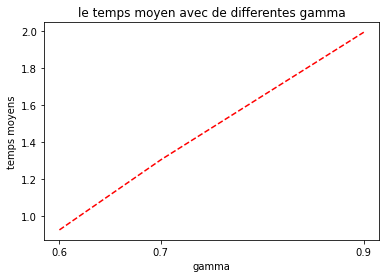

In [15]:
l1=plt.plot(gamma,y_1,'r--')
plt.xticks(gamma)
plt.title("le temps moyen avec de differentes gamma")
plt.xlabel("gamma")
plt.ylabel("temps moyens")
plt.show()

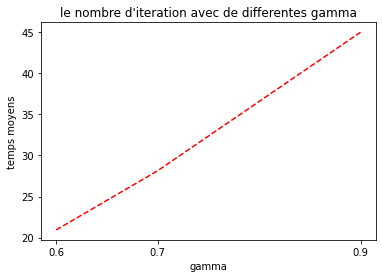

In [16]:
l1=plt.plot(gamma,y_2,'r--')
plt.xticks(gamma)
plt.title("le nombre d'iteration avec de differentes gamma")
plt.xlabel("gamma")
plt.ylabel("temps moyens")
plt.show()